In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji 
import seaborn as sns


In [2]:
# import data

df = pd.read_csv('data/dune_data.csv')



In [3]:
# Clean data


# Columns to clean
cols_to_clean = [
    'target_variable', 
    'trader_activity_status', 
    'trader_volume_status', 
    'trader_weekly_frequency_status'
]

# Remove emojis from multiple columns
for col in cols_to_clean:
        df[col] = df[col].map(lambda x: emoji.replace_emoji(x, replace='').strip())
# Standardize text to lowercase and strip whitespace

df



,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,Bad Trader,38.726119,Regular User,Low Value Trader,Unserious,2,0xa3c6acd45396110466fd8972875b3e6d33a0b0b8
1,1,Bad Trader,135.943754,Occasional User,Middle Value Trader,Unserious,1,0xbc0452c93e33b886d0e6750a9fc261e1d3c877ed
2,1,Bad Trader,0.457897,Occasional User,Low Value Trader,Unserious,1,0x477b0f0e29494a1e108a302ffecff3d76663386c
3,5,Bad Trader,37.614307,Regular User,Low Value Trader,OG,8,0x02170d140c843646d4802f6e65f9236baccc2f70
4,1,Bad Trader,2.389608,Occasional User,Low Value Trader,Unserious,1,0xcb69aceac5956af777d4d77c8d01c1fdea5828bd
...,...,...,...,...,...,...,...,...
1995,1,Bad Trader,30.584974,Occasional User,Low Value Trader,Unserious,1,0x05a3f364d84287eb3b18757643f47cd507b58438
1996,1,Bad Trader,0.109873,Occasional User,Low Value Trader,Unserious,1,0x8eb4cddb7e78fb0d5ebb75670122d2271de652a4
1997,1,Bad Trader,0.827270,Regular User,Low Value Trader,Unserious,2,0x9ef6be20528016d65e16900cb0392eb259a743ac
1998,1,Bad Trader,200.986683,Regular User,Middle Value Trader,Unserious,2,0xabaef3332e1440b3585a7ceebd6b674fbd0253f9


In [4]:
# replace target variable values with  binary values

# df['target_variable'] = df['target_variable'].replace({'Good Trader': 1, 'Bad Trader': 0})
df.target_variable  = (df.target_variable == 'Good Trader').astype(int) 

df.head(1000)

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,0,38.726119,Regular User,Low Value Trader,Unserious,2,0xa3c6acd45396110466fd8972875b3e6d33a0b0b8
1,1,0,135.943754,Occasional User,Middle Value Trader,Unserious,1,0xbc0452c93e33b886d0e6750a9fc261e1d3c877ed
2,1,0,0.457897,Occasional User,Low Value Trader,Unserious,1,0x477b0f0e29494a1e108a302ffecff3d76663386c
3,5,0,37.614307,Regular User,Low Value Trader,OG,8,0x02170d140c843646d4802f6e65f9236baccc2f70
4,1,0,2.389608,Occasional User,Low Value Trader,Unserious,1,0xcb69aceac5956af777d4d77c8d01c1fdea5828bd
...,...,...,...,...,...,...,...,...
995,3,1,781.653697,Frequent User,Middle Value Trader,OG,12,0x61f5cddec29922fd477ab43149b54901f2de6eb7
996,11,1,195.534506,Frequent User,Middle Value Trader,OG,26,0x4eefae5658a98512f21934544feee7d0584a812b
997,2,1,1819.545440,Regular User,Middle Value Trader,Just there,5,0xf6689099d9604f0bc82bada16b262b1da7f4af6b
998,4,1,497.128904,Regular User,Middle Value Trader,OG,5,0xf843949eaa6d450327599963bd61fab42e3ac7f4


In [5]:
# Visualize data



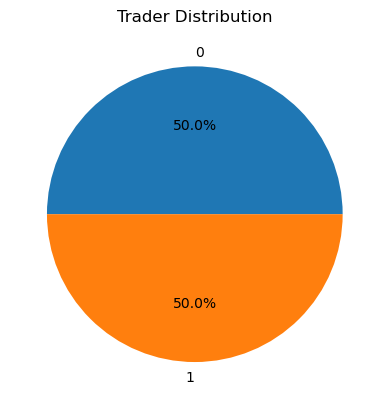

In [6]:
df['target_variable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Trader Distribution')
plt.ylabel('')
plt.show()

In [7]:
# SETTING UP THE VALIDATION FRAMEWORK

from sklearn.model_selection import train_test_split



In [8]:
df_full_train, df_test =  train_test_split(df, test_size=0.2, random_state=1)

len(df_full_train), len(df_test)

(1600, 400)

In [9]:
# get validation dataset
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(1200, 400, 400)

In [10]:
df_full_train['target_variable'].value_counts(normalize=True)

# df_val['target_variable'].value_counts(normalize=True)

target_variable
0    0.501875
1    0.498125
Name: proportion, dtype: float64

In [11]:
# make indices not to be shuffles
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
df_full_train.target_variable.value_counts(normalize=True)


target_variable
0    0.501875
1    0.498125
Name: proportion, dtype: float64

In [13]:
# get target variable
y_train = df_train.target_variable.values
y_val = df_val.target_variable.values
y_test = df_test.target_variable.values

In [14]:
# delete target variable from dataframes

del df_train['target_variable']
del df_val['target_variable']
del df_test['target_variable']

In [15]:
# EDA

df_full_train = df_full_train.reset_index(drop=True)


In [16]:
# check missing values

df_full_train.isnull().sum()

active_weeks                      0
target_variable                   0
total_volume                      0
trader_activity_status            0
trader_volume_status              0
trader_weekly_frequency_status    0
tx_count_365d                     0
wallet                            0
dtype: int64

In [17]:
# trader rate

df_full_train.target_variable.value_counts(normalize=True)


target_variable
0    0.501875
1    0.498125
Name: proportion, dtype: float64

In [18]:
global_trader_rate = df_full_train.target_variable.mean()
round(global_trader_rate, 2)

0.5

In [19]:
df_full_train.dtypes

active_weeks                        int64
target_variable                     int64
total_volume                      float64
trader_activity_status             object
trader_volume_status               object
trader_weekly_frequency_status     object
tx_count_365d                       int64
wallet                             object
dtype: object

In [20]:
# numerical and categorical columns
# exclude wallet_address column, it's just an identifier, it does not carry any predictive information
numerical = ['active_weeks', 'total_volume', 'tx_count_365d']
categorical = ['trader_activity_status', 'trader_volume_status', 'trader_weekly_frequency_status']

In [21]:
df_full_train[categorical].nunique()

trader_activity_status            3
trader_volume_status              3
trader_weekly_frequency_status    3
dtype: int64

In [22]:
df_full_train[numerical].nunique()

active_weeks       51
total_volume     1560
tx_count_365d     199
dtype: int64

In [23]:
# FEATURE IMPORTANCE: TARGET_VARIABLE RATE AND RISK RATIO

# TARGET_VARIABLE_RATE
# RISK RATIO
# MUTUAL INFORMATION


In [24]:
from IPython.display import display

for col in categorical:
    df_group = df_full_train.groupby(col).target_variable.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_trader_rate
    df_group['risk_ratio'] = df_group['mean'] / global_trader_rate
    print(f'\nColumn: {col}')
    display(df_group)


Column: trader_activity_status


,mean,count,diff,risk_ratio
trader_activity_status,,,,
Frequent User,0.886677,653,0.388552,1.780029
Occasional User,0.000000,395,-0.498125,0.000000
Regular User,0.394928,552,-0.103197,0.792828



Column: trader_volume_status


,mean,count,diff,risk_ratio
trader_volume_status,,,,
High Value Trader,0.982301,113,0.484176,1.971997
Low Value Trader,0.000000,564,-0.498125,0.000000
Middle Value Trader,0.743229,923,0.245104,1.492052



Column: trader_weekly_frequency_status


,mean,count,diff,risk_ratio
trader_weekly_frequency_status,,,,
Just there,0.402062,194,-0.096063,0.807151
OG,0.831214,865,0.333089,1.668685
Unserious,0.000000,541,-0.498125,0.000000


In [25]:
## 📊 Interpretation of Categorical Feature Analysis

"""""""""""
This section analyzes categorical features against the `target_variable` (Good vs Bad Trader).  
Each table shows the **mean**, **count**, **diff**, and **risk_ratio** values per category.

---

### 🧩 Metric Definitions
- **mean:** Proportion of good traders (1s) in each group  
- **count:** Number of samples in the group  
- **diff:** Difference from the global mean trader rate  
- **risk_ratio:** Likelihood ratio relative to the global mean  
  - `> 1.0` → better than average  
  - `< 1.0` → worse than average  

---

### 1️⃣ `trader_activity_status`

| Group | mean | Interpretation |
|--------|------|----------------|
| **Frequent User (0.89)** | Very high success rate — strong positive correlation |
| **Regular User (0.39)** | Slightly below average performance |
| **Occasional User (0.00)** | Very poor performance — strong negative correlation |

**💡 Insight:**  
Trader activity frequency is highly predictive — frequent users are almost **2× more likely** to be good traders.

---

### 2️⃣ `trader_volume_status`

| Group | mean | Interpretation |
|--------|------|----------------|
| **High Value Trader (0.98)** | Extremely strong correlation with good performance |
| **Middle Value Trader (0.74)** | Above-average success rate |
| **Low Value Trader (0.00)** | Consistently poor performance |

**💡 Insight:**  
Trading **volume** has a direct relationship with success — higher value traders perform much better.

---

### 3️⃣ `trader_weekly_frequency_status`

| Group | mean | Interpretation |
|--------|------|----------------|
| **OG (0.83)** | Strong positive correlation |
| **Just there (0.40)** | Slightly below average |
| **Unserious (0.00)** | Very poor performance |

**💡 Insight:**  
Weekly trading consistency is a strong indicator of performance.  
Consistent (“OG”) traders outperform others significantly.

---

### ✅ Overall Summary

- Higher **activity**, **volume**, and **weekly frequency** = higher chance of being a **good trader**  
- Low-engagement users tend to perform poorly  
- These categorical features are **highly predictive** and should strongly influence model performance

"""""""""



'""\nThis section analyzes categorical features against the `target_variable` (Good vs Bad Trader).  \nEach table shows the **mean**, **count**, **diff**, and **risk_ratio** values per category.\n\n---\n\n### 🧩 Metric Definitions\n- **mean:** Proportion of good traders (1s) in each group  \n- **count:** Number of samples in the group  \n- **diff:** Difference from the global mean trader rate  \n- **risk_ratio:** Likelihood ratio relative to the global mean  \n  - `> 1.0` → better than average  \n  - `< 1.0` → worse than average  \n\n---\n\n### 1️⃣ `trader_activity_status`\n\n| Group | mean | Interpretation |\n|--------|------|----------------|\n| **Frequent User (0.89)** | Very high success rate — strong positive correlation |\n| **Regular User (0.39)** | Slightly below average performance |\n| **Occasional User (0.00)** | Very poor performance — strong negative correlation |\n\n**💡 Insight:**  \nTrader activity frequency is highly predictive — frequent users are almost **2× more likel

In [26]:
# Feature importance : Mutual Information

from sklearn.metrics import mutual_info_score



In [27]:
def mutual_info_trader_score(series):
    return mutual_info_score(series, df_full_train.target_variable)


In [28]:
df_full_train[categorical].apply(mutual_info_trader_score).sort_values(ascending=False)

trader_weekly_frequency_status    0.366017
trader_volume_status              0.358240
trader_activity_status            0.317445
dtype: float64

In [29]:
# Feature correlation 
# Mutual information : a way to measure importance of categorical features
# correlation : a way to measure importance of numerical features



In [30]:
df_full_train[numerical].corrwith(df_full_train.target_variable)

active_weeks     0.538168
total_volume     0.060747
tx_count_365d    0.049071
dtype: float64

In [31]:
# one-hot encoding
# use scikit-learn's to encode categorical variables
from sklearn.feature_extraction import DictVectorizer

In [32]:
# encode training data as dictionaries
train_dicts = (df_train[categorical + numerical].to_dict(orient='records'))


In [33]:
dv = DictVectorizer(sparse=False)


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# pipeline = make_pipeline(
#     dv,
#     LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# )

train_dict = df_train[categorical + numerical].to_dict(orient='records')

# pipeline.fit(train_dict, y_train)


In [35]:
x_train = dv.fit_transform(train_dicts)


In [36]:
# validation data

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)

# Question: why do we fit and transform on training data only?
# Fit the DictVectorizer on training data (learn feature mappings) and transform it.
# Then, only transform validation data using the same fitted mappings to avoid data leakage.



In [37]:
# Train model

# from sklearn.linear_model import LogisticRegression


In [38]:
# model = LogisticRegression()
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)


model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [39]:
y_pred = model.predict_proba(x_val)[:, 1]
trader_decision = (y_pred >= 0.5)
(y_val == trader_decision).mean()  # accuracy

0.5125

In [ ]:
#Please what defines a bad and a good trader is very important…

# Looking into Return, Sharpe Ratio , Standard Deviation etc…

# Plus leveraging feature engineering… 

# Use other evaluation metrics too